# **Scatter Plot Matrix**

İki feature arasındaki kovaryans ve korelasyonu görmeye yardımcı olur.

**Kovaryans** değişkenlerin hareket yönünü gösterirken **korelasyon** iki değişkenin birbirine ne kadar benzerlikte hareket ettiğini gösterir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade plotly 

In [ ]:
!pip install jupyter-dash

In [2]:
timesData = pd.read_csv("/content/drive/MyDrive/data/timesData.csv")

In [3]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
dataframe = timesData[timesData.year == 2015]  #datadaki 2015 yılından bir filtre oluşturulup, bu filtre dataya uygulanır.

In [5]:
data2015 = dataframe.loc[:,["research","citations", "teaching"]] 
#2015 yılındaki research, citations, teaching sütunlarının tüm sütunları data2015 değişkenine aktarılır.

In [6]:
data2015["index"] = np.arange(1,len(data2015)+1) 
#datanın uzunluğunda bir liste oluşturulup bu liste index adındaki feature'a eşitlenir.

In [8]:
data2015.head()

,research,citations,teaching,index
1402,98.1,99.7,92.2,1
1403,98.6,98.9,92.9,2
1404,97.7,95.5,88.6,3
1405,96.7,99.1,91.5,4
1406,95.6,95.2,89.7,5


In [9]:
fig = ff.create_scatterplotmatrix( #plotly'ın figure factory kütüphanesinden scatter plot matrix çağrılır.
                                  data2015, #data verilir.
                                  diag='box',  #diagonal dikdörtgenin bir köşesinden diğer köşesine çizilen çizgidir. box plot türü seçilmiştir.
                                  index='index', #index olarak oluşturulan index sütunu seçilir.
                                  colormap='Portland', #derece arttıkça maviden kırmızıya giden bir colormap
                                  colormap_type='cat',  #cat -> categorical demektir ve indeksteki her kategoriye renk haritasından bir renk atanır.
                                  height=700, width=700) #boyut verildi.
iplot(fig) #figür plot edilir.

Github'da Ipython kernel olmadığı için pyplot görselleştirmeleri 
gözükmemektedir. Bu yüzden png formatında yüklenmiştir.

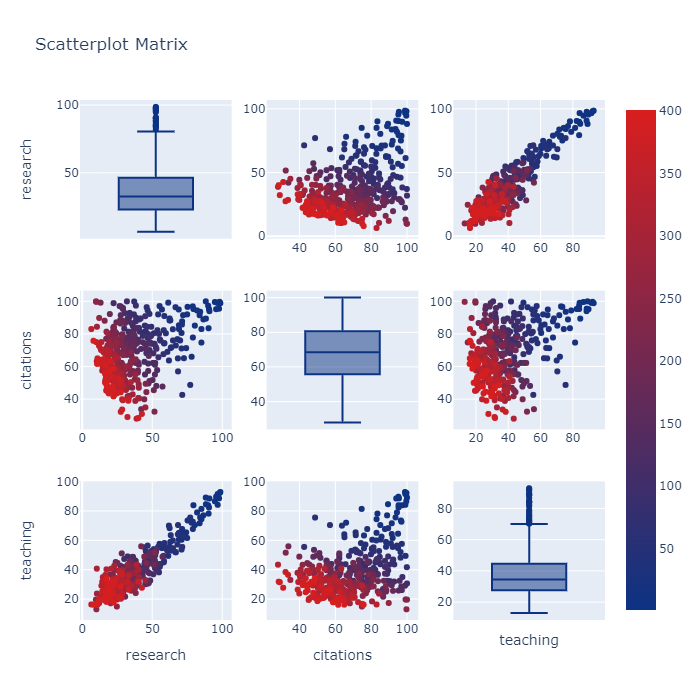

Bu plot yorumlandığında research ve citiations arasında pek bir bağlantı olmadığı ancak research ve teaching arasında pozitif yönlü bir korelasyon olduğu söylenebilir.

Box plotlara bakıldığında research ve teaching sütunlarında outlierlar olduğu görülür.